In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt  
%config InlineBackend.figure_format = 'retina'
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

The purpose of this notebook is to check the convergence of the sample mean to the real mean of a Pareto distribution in comparison to a Gaussian distribution

In [2]:
def mean_pareto(a):
    return a/float(a-1)
mean_pareto(1.16)

7.2500000000000036

Let's see how the sample mean converges as we draw up to 1 million samples from a Pareto distribution with a = 1.16 (80/20 rule).

In [ ]:
pareto_list = np.random.pareto(1.16,1000000)+1
pareto_mean = []
previous_mean = 0
for i in range(len(pareto_list)):
    current_mean = np.mean(pareto_list[:i+1])
    pareto_mean.append(current_mean)
    previous_mean = current_mean

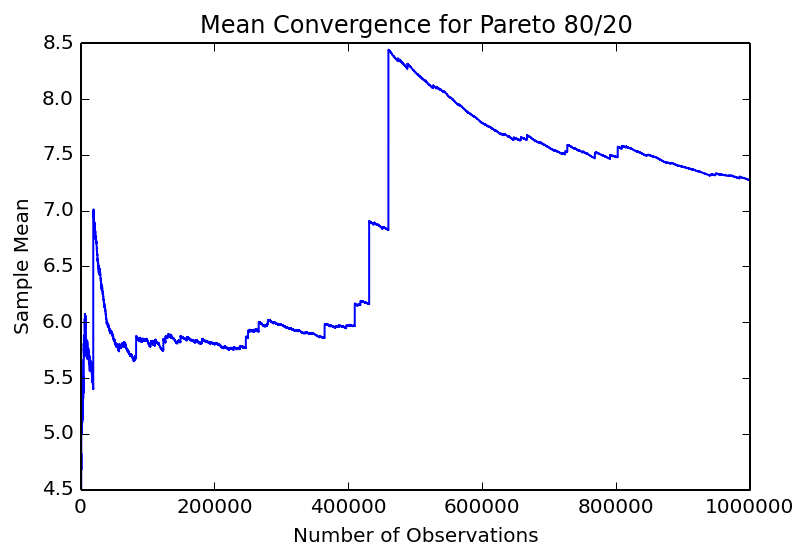

In [18]:
plt.plot(range(len(pareto_mean)), pareto_mean)
plt.ylim(4.5,8.5)
plt.xlabel("Number of Observations")
plt.ylabel("Sample Mean")
plt.title("Mean Convergence for Pareto 80/20")

As we can see, the sample mean doesn't converge pretty well - after 1 million observations, we can't tell for sure if it has already converged. Let's check the same for the Gaussian Distribution with the same mean - 7.25 - and a standard deviation of 4.

In [15]:
gaussian_list = np.random.normal(7.25,4,1000)
gaussian_mean = []
previous_mean = 0
for i in range(len(gaussian_list)):
    current_mean = np.mean(gaussian_list[:i+1])
    gaussian_mean.append(current_mean)
    previous_mean = current_mean

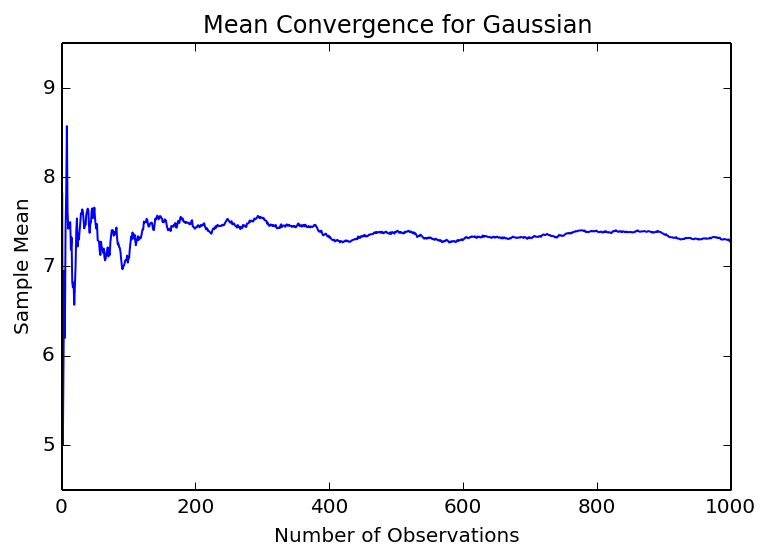

In [19]:
plt.plot(range(len(gaussian_mean)), gaussian_mean)
plt.ylim(4.5,9.5)
plt.xlabel("Number of Observations")
plt.ylabel("Sample Mean")
plt.title("Mean Convergence for Gaussian")

The Gaussian distribution converges much faster than the Pareto. After 1000 observations the sample mean has already converged to the real mean.

The point is that when we are dealing with Pareto distributions, a sample mean analysis is almost NEVER enough for any meaningful conclusion - it depends on the value of the parameter a. Hence, one must be careful when doing statistical analysis on Pareto distributions - most of social sciences data is Pareto, and since our demographic data is not that big, there are a lot of work in this field that are relying on the wrong conclusion because of this sample mean convergence issue.